In [241]:
#main library used for the proj.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('/content/estate_data.csv')

In [242]:
#first look at the dataset.
df

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...
147533,"2 room apartment in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",NaN,NaN,NaN,3.0,2.0,2.0,NaN,84 m²,477146.0,https://realting.com/uploads/bigSlider/4ae/9d8...,https://realting.com/property-for-sale/turkey/...
147534,"Apartment in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819163.0,https://realting.com/uploads/bigSlider/164/7e6...,https://realting.com/property-for-sale/turkey/...


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [244]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
count,64719.000000,68224.000000,54592.000000,74178.000000,36982.000000,55973.000000,1.449610e+05
mean,1996.921754,8.575692,5.791709,2.572097,2.289222,1.364229,4.121722e+05
std,157.527635,8.356781,5.541368,1.319545,18.276913,0.745019,8.420984e+05
min,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,0.000000e+00
25%,2004.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.054200e+05
50%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.902120e+05
75%,2024.000000,14.000000,8.000000,3.000000,3.000000,2.000000,3.989300e+05
max,2316.000000,124.000000,202.000000,124.000000,2009.000000,43.000000,3.060283e+07


#Preprocessing phase:


In [245]:
#logic between the apartment_floor and the building_total_floors
condition = df['apartment_floor'] <= df['building_total_floors']
df = df[condition]

In [246]:
df = df.dropna(how='any',axis=0)
#dropping any rows that has Nan (no value) innit.

In [247]:
#dropping Unnecessary, excessive, nominal variables in dataset
df.drop(['location'],axis=1,inplace=True)
df.drop(['title'],axis=1,inplace=True)
df.drop(['image'],axis=1,inplace=True)
df.drop(['url'],axis=1,inplace=True)

<ipython-input-247-d8c3ace11096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['location'],axis=1,inplace=True)
<ipython-input-247-d8c3ace11096>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['title'],axis=1,inplace=True)
<ipython-input-247-d8c3ace11096>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['image'],axis=1,inplace=True)
<ipython-input-247-d8c3ace11096>:5: SettingWithCopyWarning: 
A value is t

In [248]:
#extract the numeric value only from area_variables.
df['apartment_total_area'] = df['apartment_total_area'].apply(lambda x: int(str(x).rstrip(" m²").replace(' ','')))
df['apartment_living_area'] = df['apartment_living_area'].apply(lambda x: int(str(x).rstrip(" m²").replace(' ','')))

<ipython-input-248-ec9fca1c1028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['apartment_total_area'] = df['apartment_total_area'].apply(lambda x: int(str(x).rstrip(" m²").replace(' ','')))
<ipython-input-248-ec9fca1c1028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['apartment_living_area'] = df['apartment_living_area'].apply(lambda x: int(str(x).rstrip(" m²").replace(' ','')))


In [249]:
#looking for duplicated values in the dataset.
df.isna().sum()

,0
country,0
building_construction_year,0
building_total_floors,0
apartment_floor,0
apartment_rooms,0
apartment_bedrooms,0
apartment_bathrooms,0
apartment_total_area,0
apartment_living_area,0
price_in_USD,0


In [250]:
df

,country,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD
15,Czech Republic,2023.0,4.0,2.0,4.0,2.0,1.0,54,54,314990.0
146,Turkey,2020.0,4.0,4.0,3.0,2.0,1.0,93,75,248071.0
156,Uzbekistan,2025.0,11.0,8.0,2.0,1.0,1.0,76,44,90021.0
229,Turkey,2013.0,4.0,4.0,1.0,3.0,3.0,220,216,338143.0
280,Turkey,2019.0,7.0,7.0,5.0,4.0,2.0,210,195,368469.0
...,...,...,...,...,...,...,...,...,...,...
147408,Indonesia,2025.0,4.0,4.0,3.0,2.0,2.0,60,60,121800.0
147411,Indonesia,2024.0,4.0,4.0,2.0,2.0,2.0,88,78,180000.0
147415,Indonesia,2023.0,4.0,1.0,2.0,2.0,2.0,162,162,650000.0
147422,Indonesia,2024.0,4.0,2.0,2.0,2.0,2.0,204,204,730000.0


In [251]:
'''As you can see above, the values of apartment_total_area	and apartment_living_area
almost the same. Not trying to have VIF in the model.'''
df.drop(['apartment_living_area'],axis=1,inplace=True)
df.drop(['apartment_rooms'],axis=1,inplace=True)

In [252]:
'''make a function to visualize the datapoint though boxplot, and counts how many
outliers are there in the dataset.'''
def visualize_outliers(df, price_in_USD):
  plt.figure(figsize=(10, 6))  # adjusting figuresize of the plots.
  sns.boxplot(x=df[price_in_USD])
  plt.xlabel(price_in_USD)
  plt.show()
# calculating Interquartile range
  Q1 = df[price_in_USD].quantile(0.25)
  Q3 = df[price_in_USD].quantile(0.75)
  IQR = Q3 - Q1
# Identifying lower and upper bounds.
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  outliers = df[(df[price_in_USD] < lower_bound) | (df[price_in_USD] > upper_bound)][price_in_USD]
  if not outliers.empty:
    print("\nObservations need to be considered:")
    print(outliers)
    print(f"\nNumber of outliers: {len(outliers)}")
  else:
    print("\nNo outliers are in this variable")

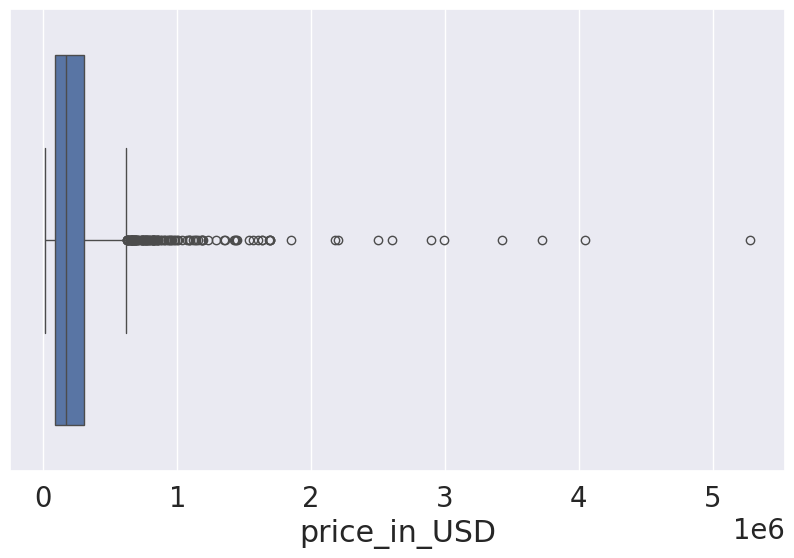


Observations need to be considered:
3937       686947.0
4065       696721.0
4074       820631.0
4090       733677.0
4276      1190186.0
            ...    
143768     880924.0
145528     664044.0
147415     650000.0
147422     730000.0
147447     850000.0
Name: price_in_USD, Length: 123, dtype: float64

Number of outliers: 123


In [253]:
try:
  visualize_outliers(df, 'price_in_USD')  # execute.
except NameError:
    print("Error: Dataframe is not defined")

Dataframe size at first: 1741
After removing outliers: 1618
Observations removed: 123


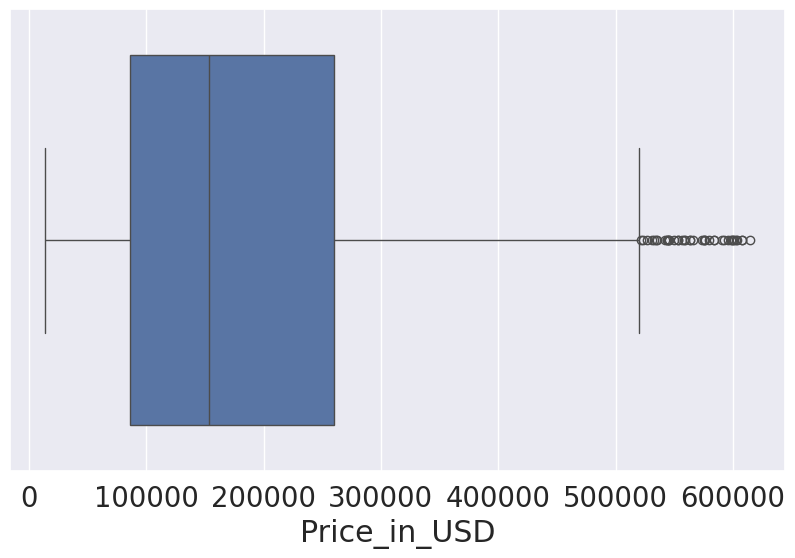

In [254]:
def remove_outliers(df, column_name):

  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  # filter all the outliers
  df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

  return df_filtered

try:
  data_no_outliers = remove_outliers(df, 'price_in_USD')

  print(f"Dataframe size at first: {len(df)}")
  print(f"After removing outliers: {len(data_no_outliers)}")
  print(f"Observations removed: {len(df) - len(data_no_outliers)}")

  plt.figure(figsize=(10, 6))
  sns.boxplot(x=data_no_outliers['price_in_USD'])
  plt.xlabel("Price_in_USD")
  plt.show()

except NameError:
    print("Error: Dataframe is not defined.")
except KeyError:
    print("Error: Price_in_USD is not defined.")

In [255]:
df = data_no_outliers
df

,country,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
15,Czech Republic,2023.0,4.0,2.0,2.0,1.0,54,314990.0
146,Turkey,2020.0,4.0,4.0,2.0,1.0,93,248071.0
156,Uzbekistan,2025.0,11.0,8.0,1.0,1.0,76,90021.0
229,Turkey,2013.0,4.0,4.0,3.0,3.0,220,338143.0
280,Turkey,2019.0,7.0,7.0,4.0,2.0,210,368469.0
...,...,...,...,...,...,...,...,...
146346,Indonesia,2024.0,4.0,2.0,1.0,1.0,101,490000.0
146360,Indonesia,2024.0,4.0,2.0,1.0,1.0,81,260000.0
147397,Indonesia,2024.0,4.0,4.0,1.0,1.0,60,140000.0
147408,Indonesia,2025.0,4.0,4.0,2.0,2.0,60,121800.0


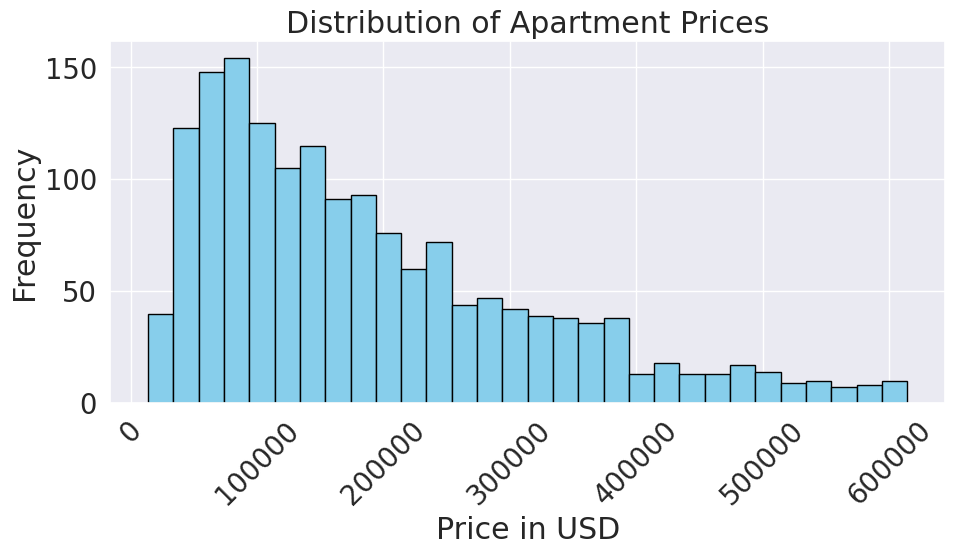

In [256]:
#see the distribution of Apartment Prices.
plt.figure(figsize=(10, 6))
df['price_in_USD'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.title("Distribution of Apartment Prices")
plt.tight_layout()
plt.show()


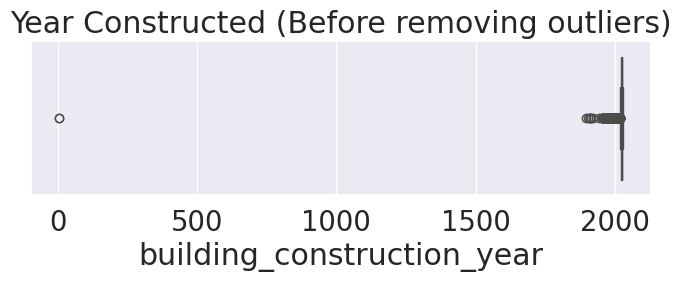

After removing outliers: (1386, 8)


In [257]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['building_construction_year'])
plt.title('Year Constructed (Before removing outliers)')
plt.show()

col = 'building_construction_year'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"After removing outliers: {df.shape}")


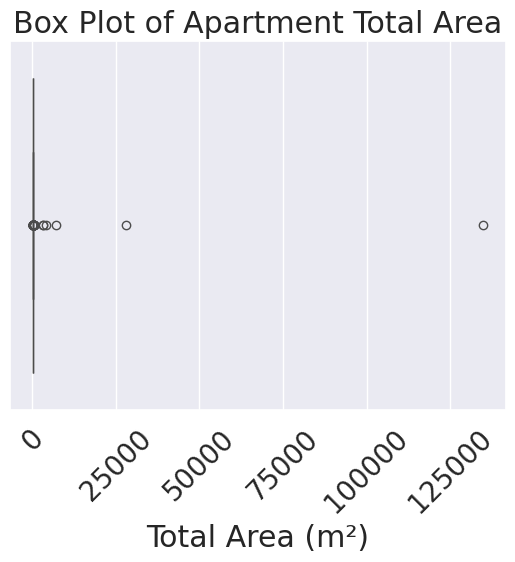

In [258]:
sns.boxplot(x=df['apartment_total_area'])
plt.title("Box Plot of Apartment Total Area")
plt.xlabel("Total Area (m²)")
plt.xticks(rotation=45)
plt.show()

In [259]:
Q1 = df['apartment_total_area'].quantile(0.25)
Q3 = df['apartment_total_area'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR

df_clean = df[df['apartment_total_area'] <= upper_fence]

In [260]:
df = df_clean
df.shape

(1329, 8)

In [261]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,2022.818661,12.249059,6.109857,1.670429,1.355154,84.254327,184644.555305
std,1.789632,11.181638,7.239552,0.776949,0.544943,37.214030,127110.136827
min,2017.000000,1.000000,1.000000,1.000000,1.000000,26.000000,15985.000000
25%,2022.000000,4.000000,1.000000,1.000000,1.000000,56.000000,85120.000000
50%,2023.000000,8.000000,3.000000,1.000000,1.000000,76.000000,149674.000000
75%,2024.000000,16.000000,8.000000,2.000000,2.000000,105.000000,250000.000000
max,2027.000000,65.000000,51.000000,5.000000,4.000000,195.000000,614347.000000


#EDA to see more about the patterns and statistical index of the dataset.

---

#Univariate Analysis.



In [262]:
df

,country,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
15,Czech Republic,2023.0,4.0,2.0,2.0,1.0,54,314990.0
146,Turkey,2020.0,4.0,4.0,2.0,1.0,93,248071.0
156,Uzbekistan,2025.0,11.0,8.0,1.0,1.0,76,90021.0
424,Turkey,2023.0,3.0,3.0,5.0,2.0,160,344556.0
491,Montenegro,2023.0,8.0,5.0,1.0,1.0,69,336245.0
...,...,...,...,...,...,...,...,...
146346,Indonesia,2024.0,4.0,2.0,1.0,1.0,101,490000.0
146360,Indonesia,2024.0,4.0,2.0,1.0,1.0,81,260000.0
147397,Indonesia,2024.0,4.0,4.0,1.0,1.0,60,140000.0
147408,Indonesia,2025.0,4.0,4.0,2.0,2.0,60,121800.0


<ipython-input-263-9ac6e0e69e1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_years_data,


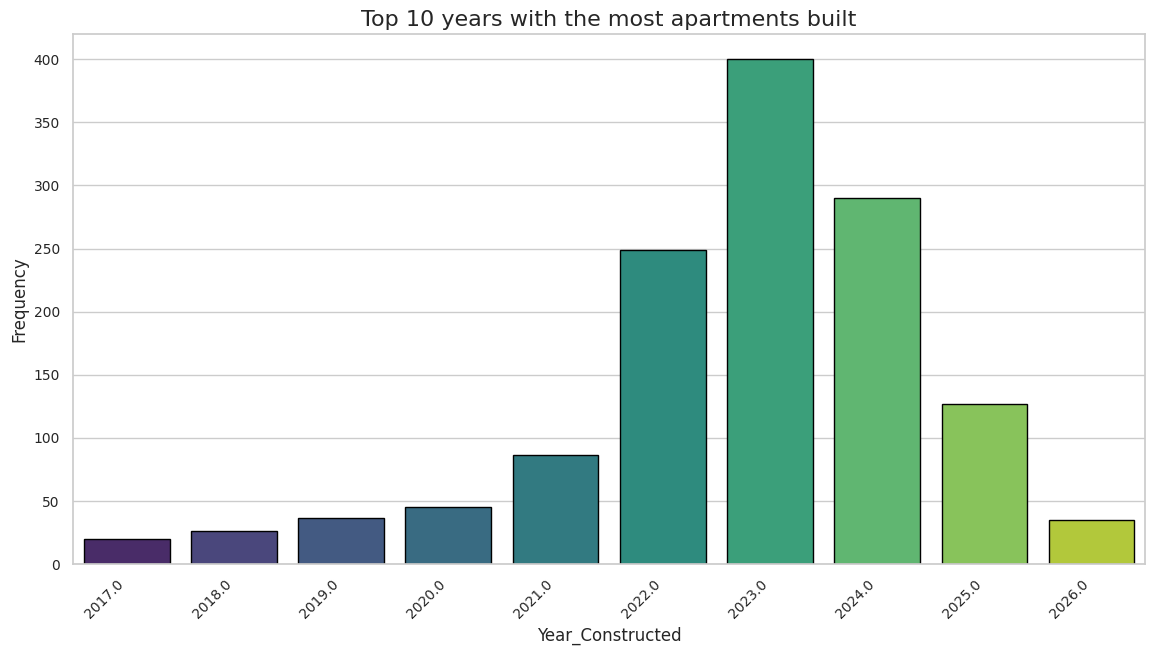

In [263]:
top_years_data = df['building_construction_year'].value_counts().head(10).reset_index()
top_years_data.columns = ['Year_Constructed', 'Count']
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.barplot(data=top_years_data,
            x='Year_Constructed',
            y='Count',
            palette='viridis',
            edgecolor='black')

plt.title("Top 10 years with the most apartments built", fontsize=16)
plt.xlabel('Year_Constructed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

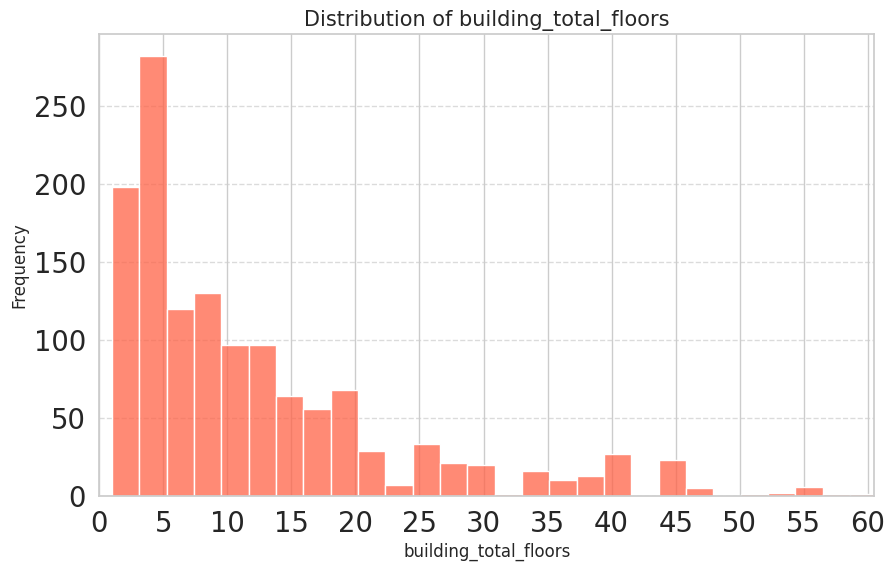

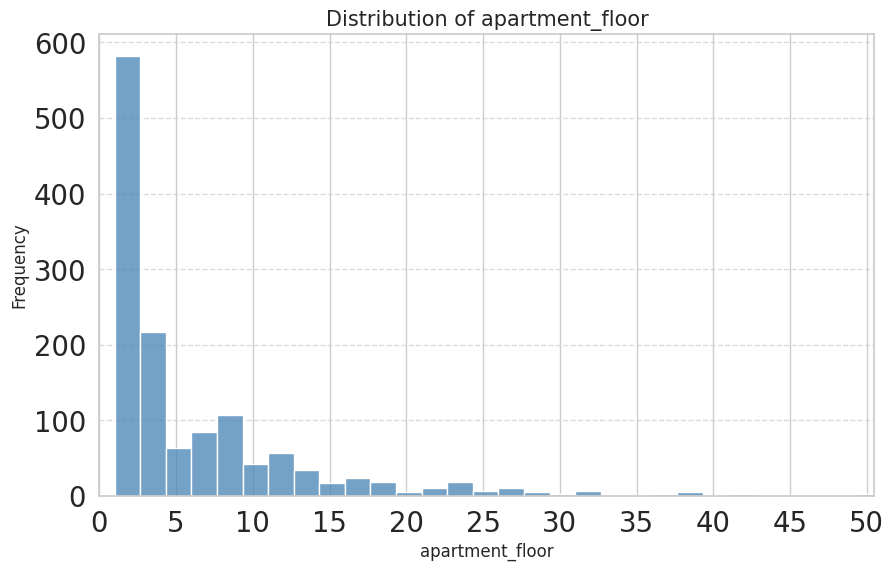

In [264]:
columns_to_plot = ['building_total_floors', 'apartment_floor']
colors = ['#FF6347', '#4682B4']
sns.set_style('whitegrid')


for i, column in enumerate(columns_to_plot):
    if column not in df.columns:
        print(f"Warning the {column} is not in the df. Skip.")
        continue

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=False, color=colors[i], bins=30)

    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    if column == 'building_total_floors':
        limit_max = 60
        plt.xlim(0.5, limit_max + 0.5)
        plt.xticks(np.arange(0, limit_max + 1, 5))
    elif column == 'apartment_floor':
        limit_max = 50
        plt.xlim(0.5, limit_max + 0.5)
        plt.xticks(np.arange(0, limit_max + 1, 5))

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Warning the'apartment_rooms' not exist in the DataFrame. Skip.


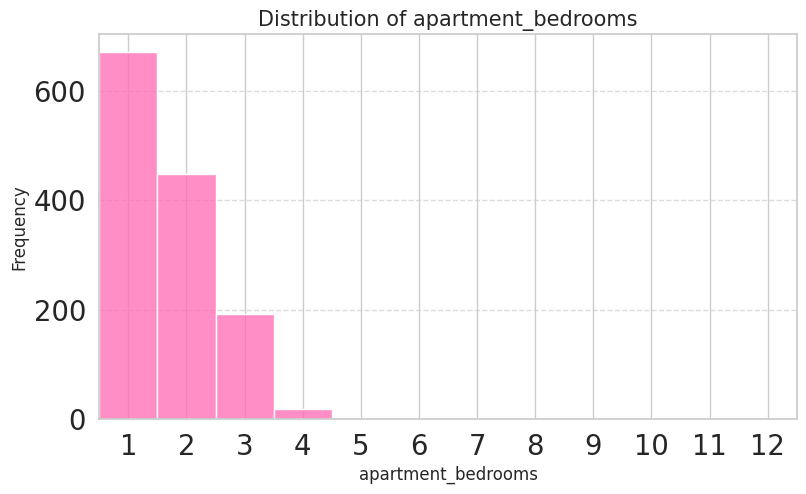

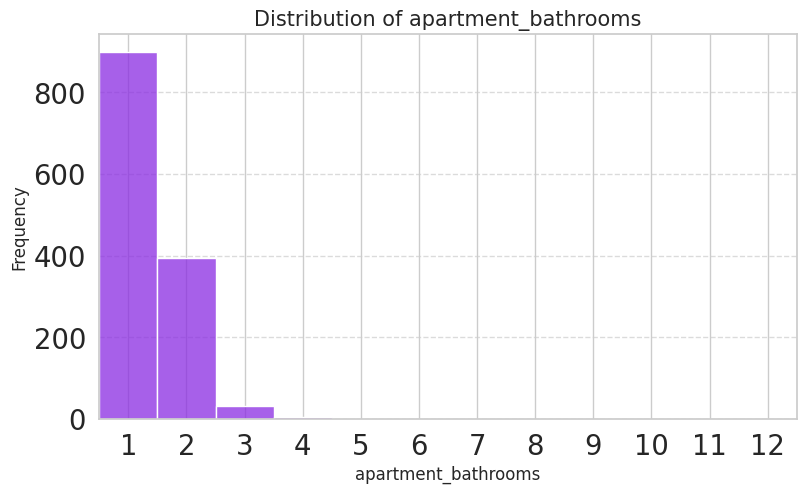

In [265]:
columns_to_plot = ['apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms']
colors = ['#20B2AA', '#FF69B4', '#8A2BE2']
sns.set_style('whitegrid')

for i, column in enumerate(columns_to_plot):
    if column not in df.columns:
        print(f"Warning the'{column}' not exist in the DataFrame. Skip.")
        continue

    plt.figure(figsize=(9, 5))
    sns.histplot(data=df, x=column, color=colors[i], discrete=True)

    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0.5, 12.5)

    plt.xticks(range(1, 13))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<ipython-input-266-6a4afec77f65>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_bars)


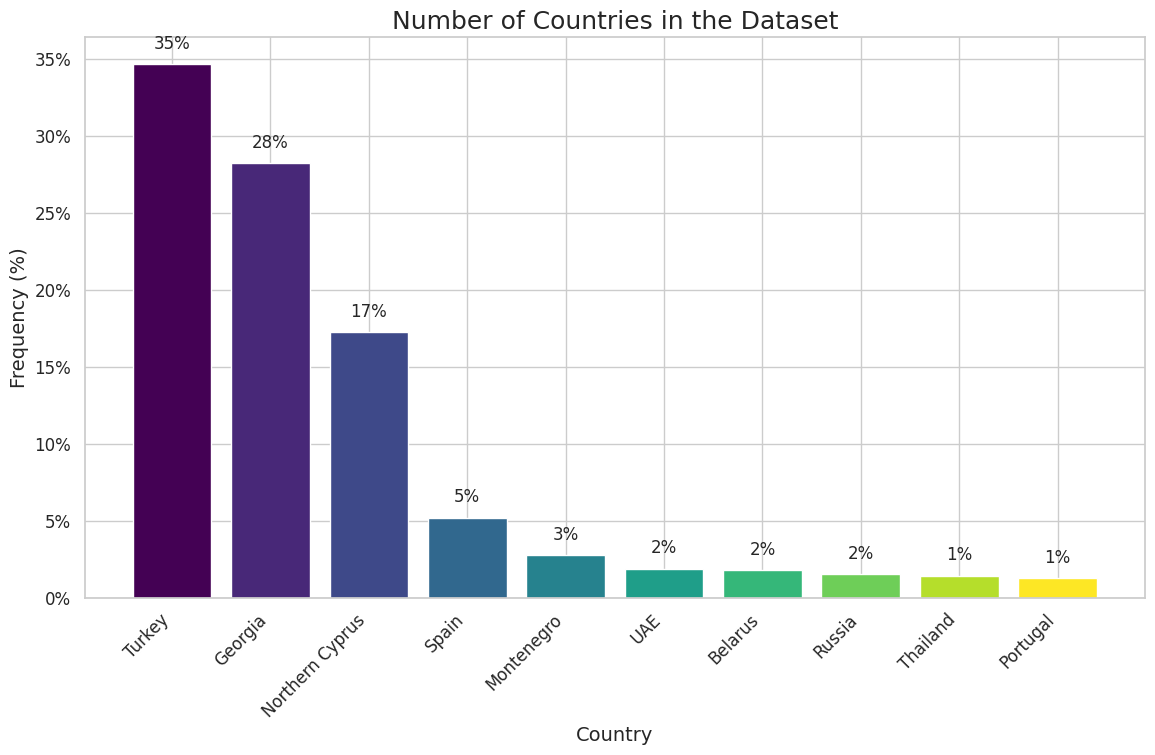

In [266]:
#Want to see in the data remain, the place that most of the data comefrom.
country_frequencies = df['country'].value_counts(normalize=True).head(10)
num_bars = len(country_frequencies)
colors = plt.cm.get_cmap('viridis', num_bars)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(country_frequencies.index, country_frequencies.values, color=colors(np.arange(num_bars)))

ax.set_title('Number of Countries in the Dataset', fontsize=18)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Frequency (%)', fontsize=14)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height:.0%}',
                (p.get_x() + p.get_width() / 2, height + 0.01),
                ha='center', fontsize=12)

plt.tight_layout()
plt.show()

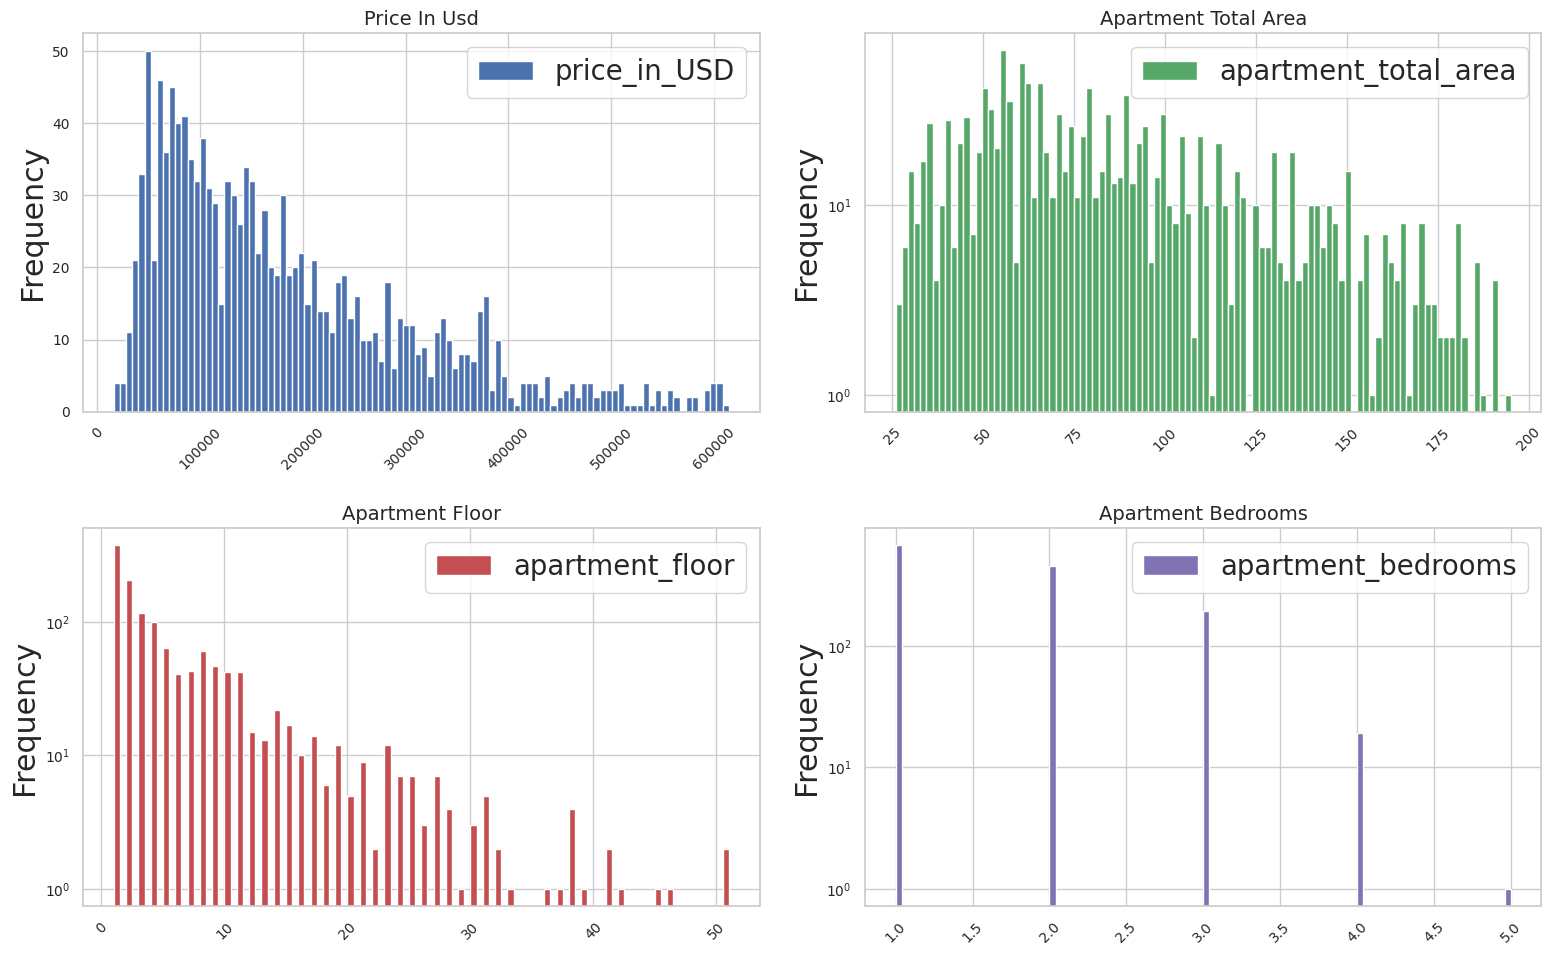

In [267]:
from matplotlib.pyplot import subplots, tight_layout
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']  # Màu đẹp mắt, dễ phân biệt

fig, ax = subplots(figsize=(16, 10), ncols=2, nrows=2)

columns = ['price_in_USD', 'apartment_total_area', 'apartment_floor', 'apartment_bedrooms']

for index, column in enumerate(columns):
    df[column].plot.hist(
        ax=ax.ravel()[index],
        bins=100,
        legend=True,
        log=index != 0,
        color=colors[index],
        edgecolor='white'
    )
    ax.ravel()[index].set_title(column.replace('_', ' ').title(), fontsize=14)
    ax.ravel()[index].tick_params(axis='x', labelrotation=45)
    ax.ravel()[index].tick_params(labelsize=10)

tight_layout()
plt.show()

#Multivariate Analysis.

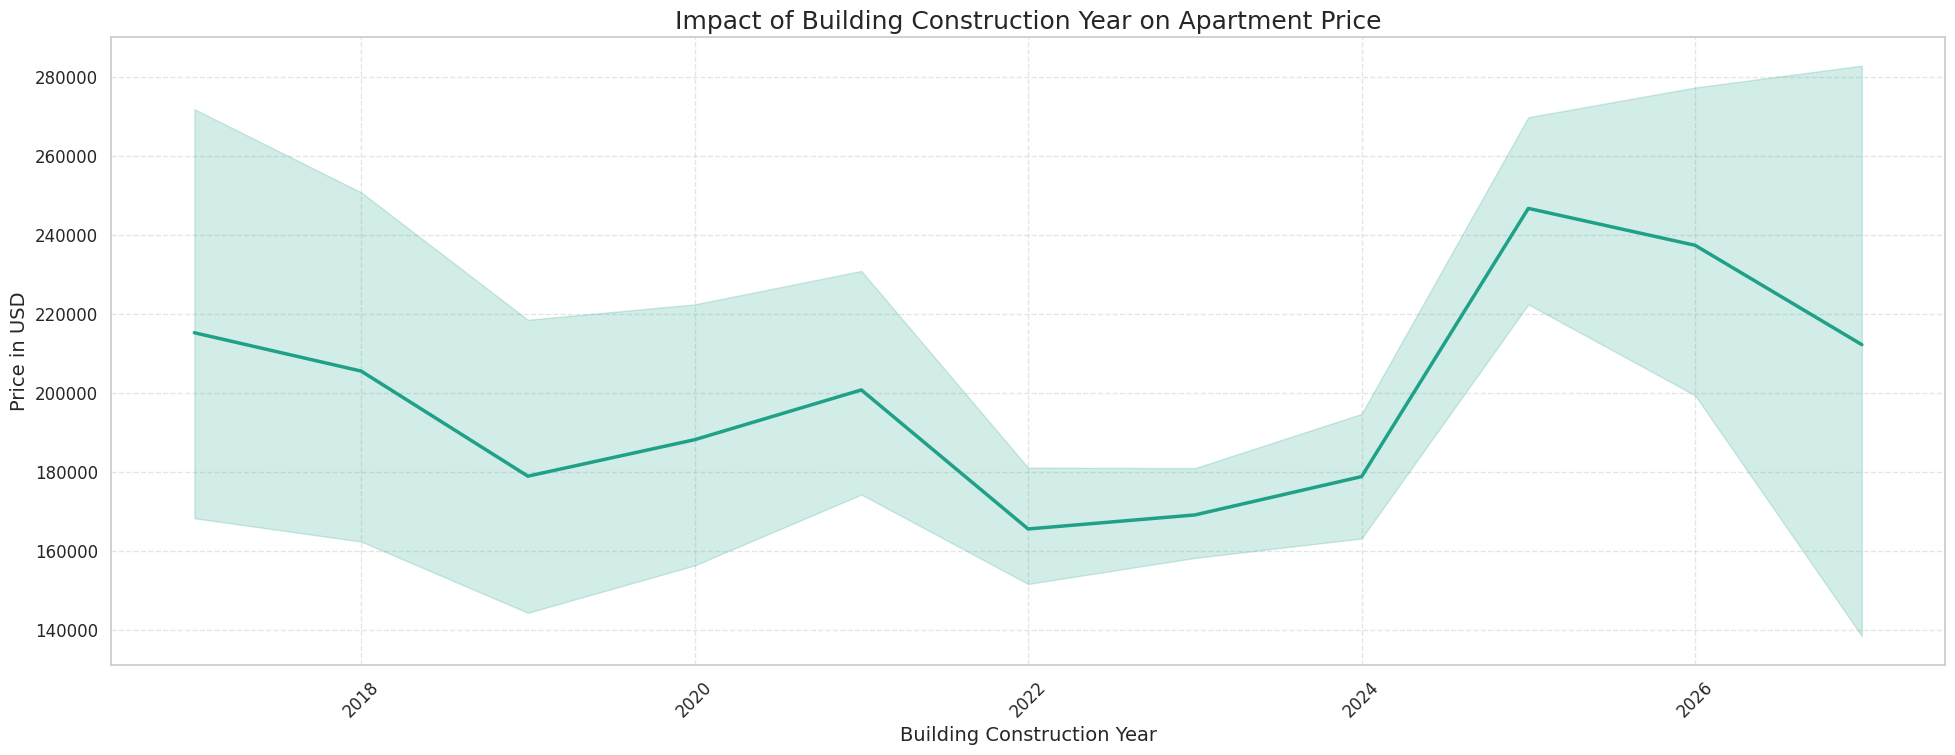

In [268]:
#Does the year of construction of the building affect the price of the apartment ?
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=df,
    x='building_construction_year',
    y='price_in_USD',
    color=sns.color_palette("viridis")[3],
    linewidth=2.5
)

plt.title('Impact of Building Construction Year on Apartment Price', fontsize=18)
plt.xlabel('Building Construction Year', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [269]:
matrix = df.select_dtypes(include=['number']).corr()
print('Correlation Matrix:')
matrix

Correlation Matrix:


,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
building_construction_year,1.000000,0.030820,-0.028335,-0.087422,0.002001,-0.063551,0.056919
building_total_floors,0.030820,1.000000,0.766673,-0.261583,-0.245250,-0.330884,-0.282288
apartment_floor,-0.028335,0.766673,1.000000,-0.183526,-0.191988,-0.267983,-0.217970
apartment_bedrooms,-0.087422,-0.261583,-0.183526,1.000000,0.648371,0.760668,0.459910
apartment_bathrooms,0.002001,-0.245250,-0.191988,0.648371,1.000000,0.662909,0.545258
apartment_total_area,-0.063551,-0.330884,-0.267983,0.760668,0.662909,1.000000,0.507256
price_in_USD,0.056919,-0.282288,-0.217970,0.459910,0.545258,0.507256,1.000000


<Axes: >

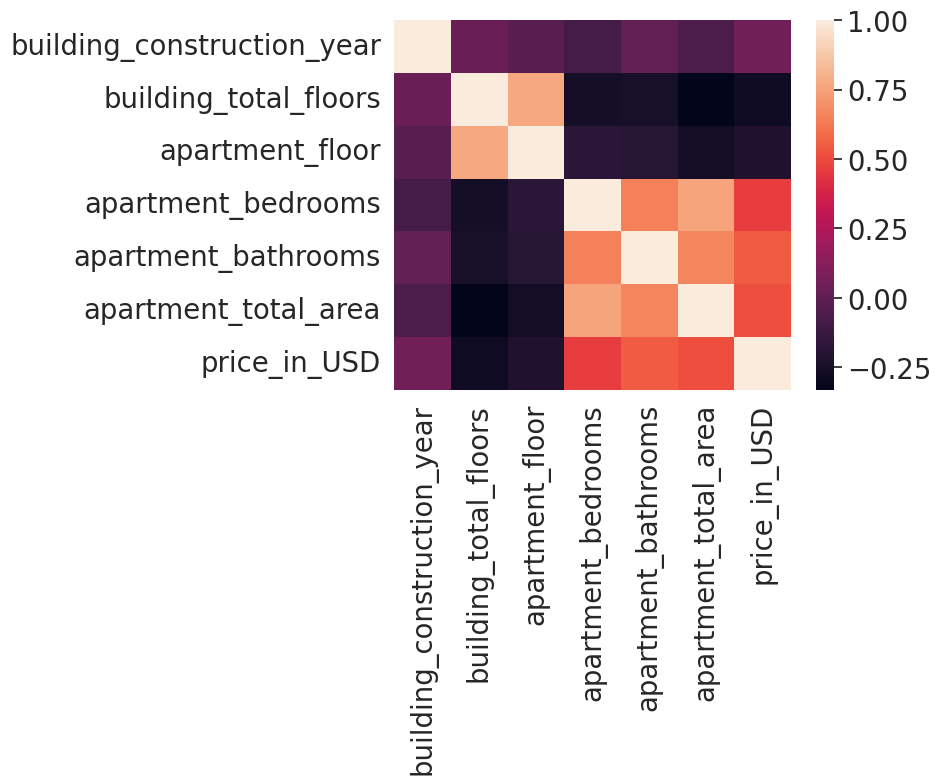

In [270]:
#Using Heatmap to detect high correlation between variables in the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

#Choosing Numeric Value based on the upper correlation matrix.
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

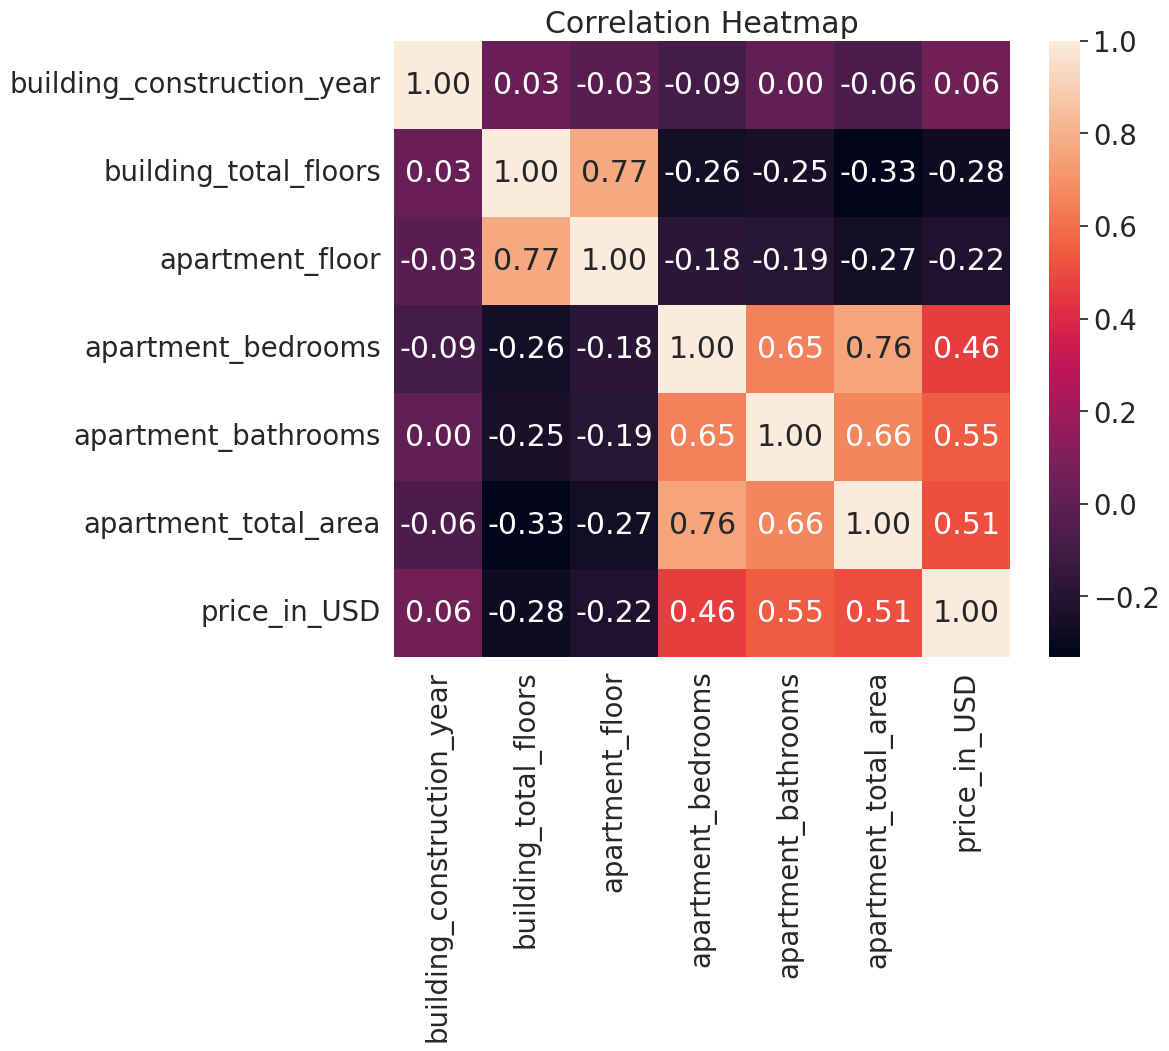

In [271]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

In [274]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['apartment_bedrooms', 'apartment_total_area', 'apartment_floor', 'building_total_floors']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable        VIF
0                  const  10.431574
1     apartment_bedrooms   2.384408
2   apartment_total_area   2.493852
3        apartment_floor   2.438183
4  building_total_floors   2.539298


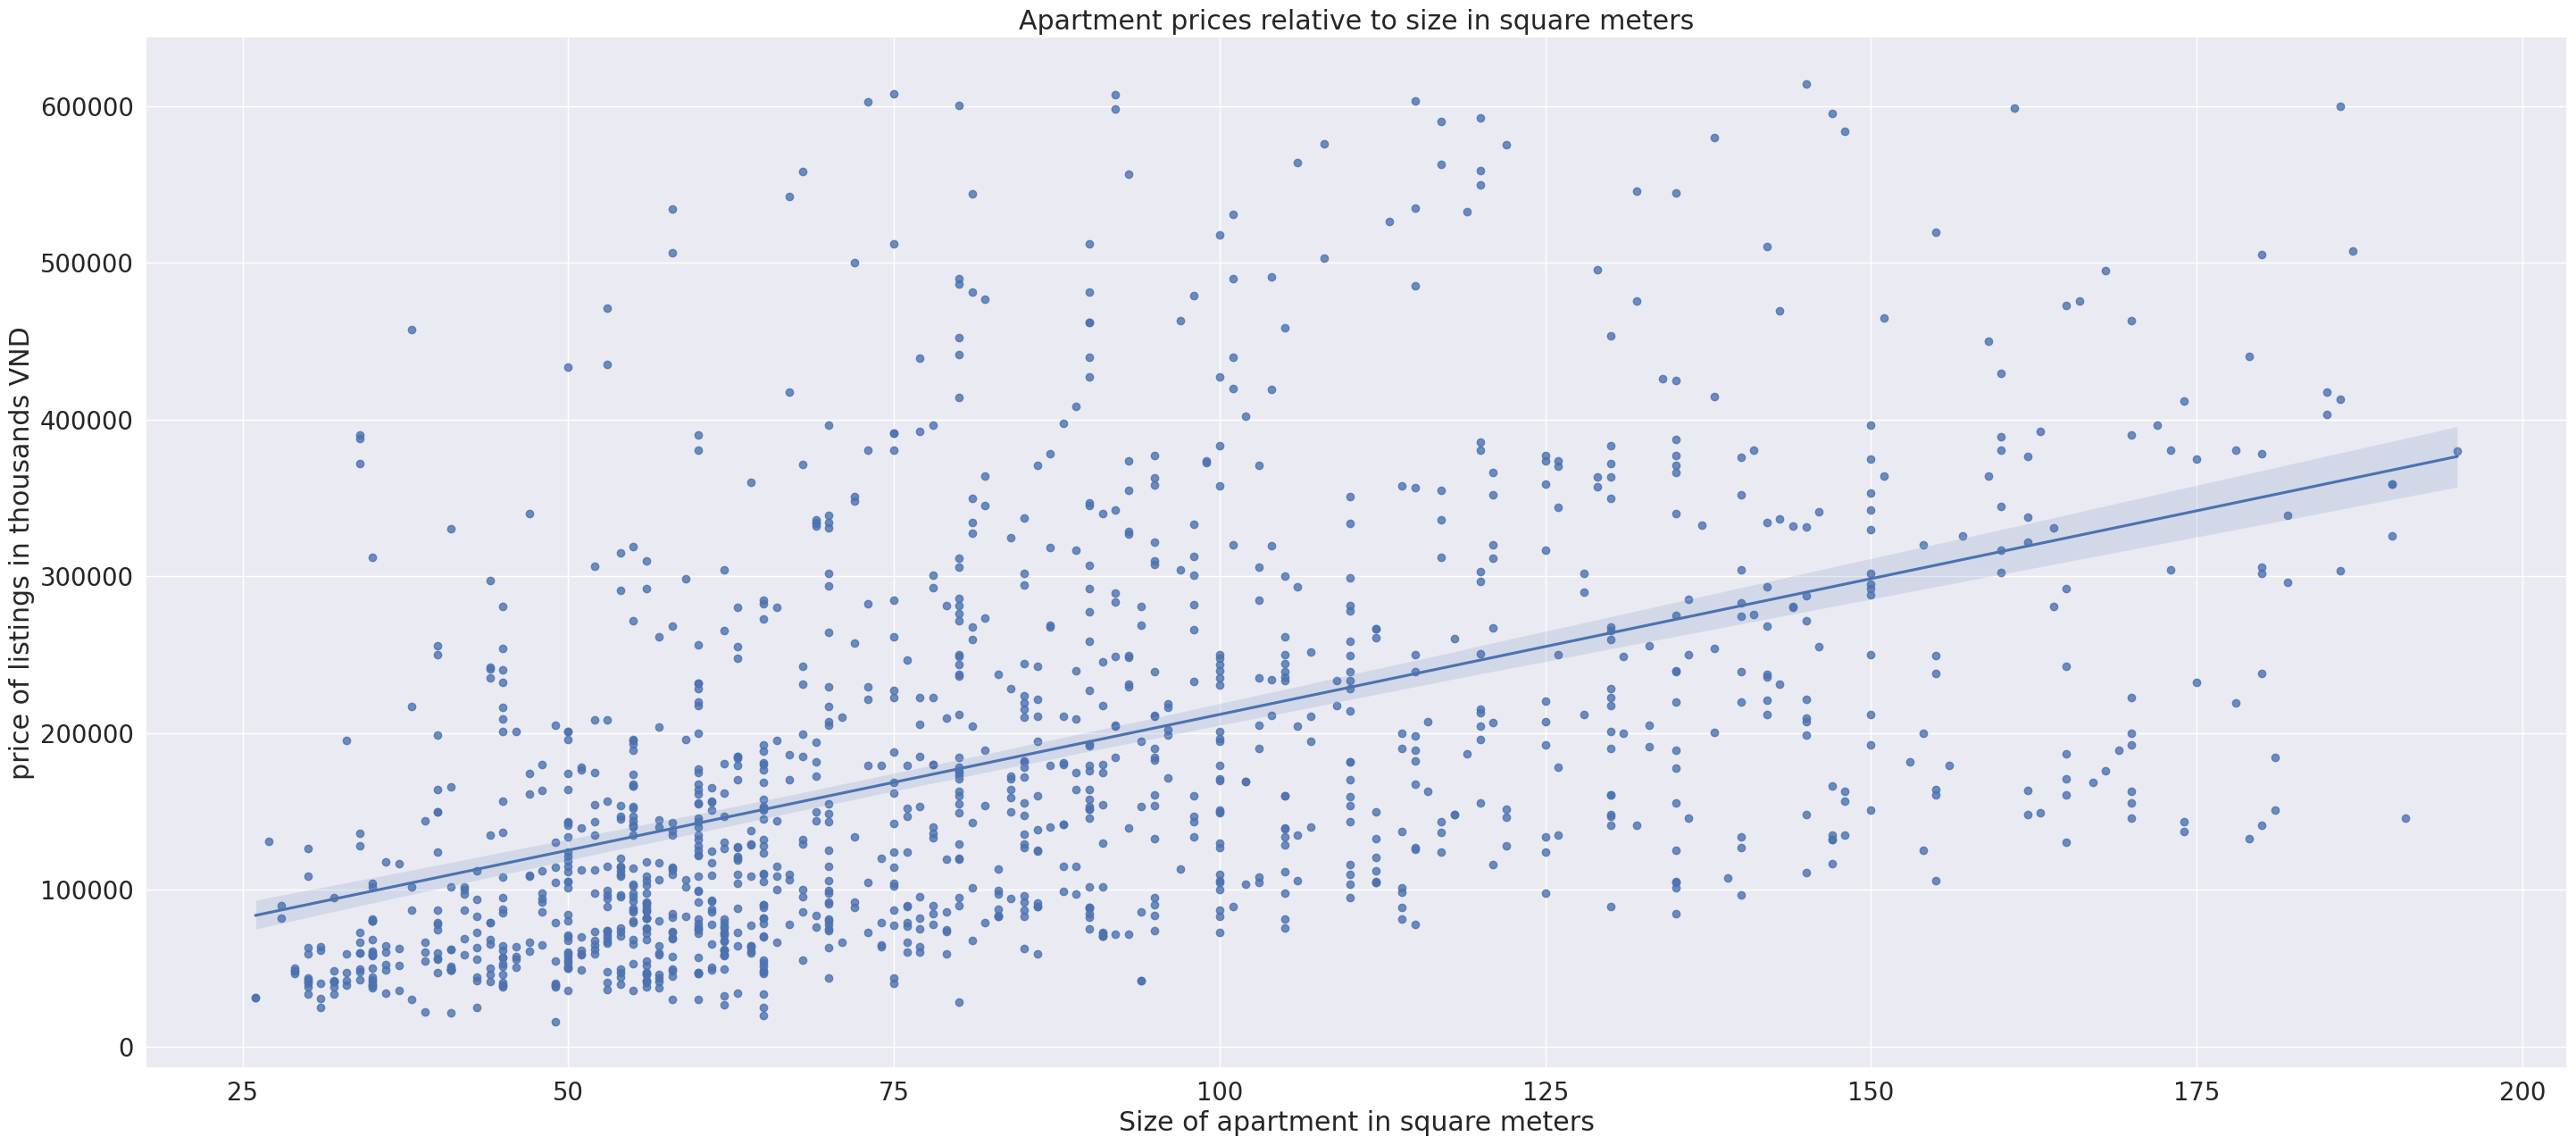

In [273]:
plt.figure(figsize=(35,15))
sns.set(font_scale= 1.8)
g4 = sns.regplot(data=df,
                  x='apartment_total_area',
                  y='price_in_USD')
g4.set(xlabel='Size of apartment in square meters')
g4.set(ylabel='price of listings in thousands VND')
g4.set(title='Apartment prices relative to size in square meters')
plt.show()


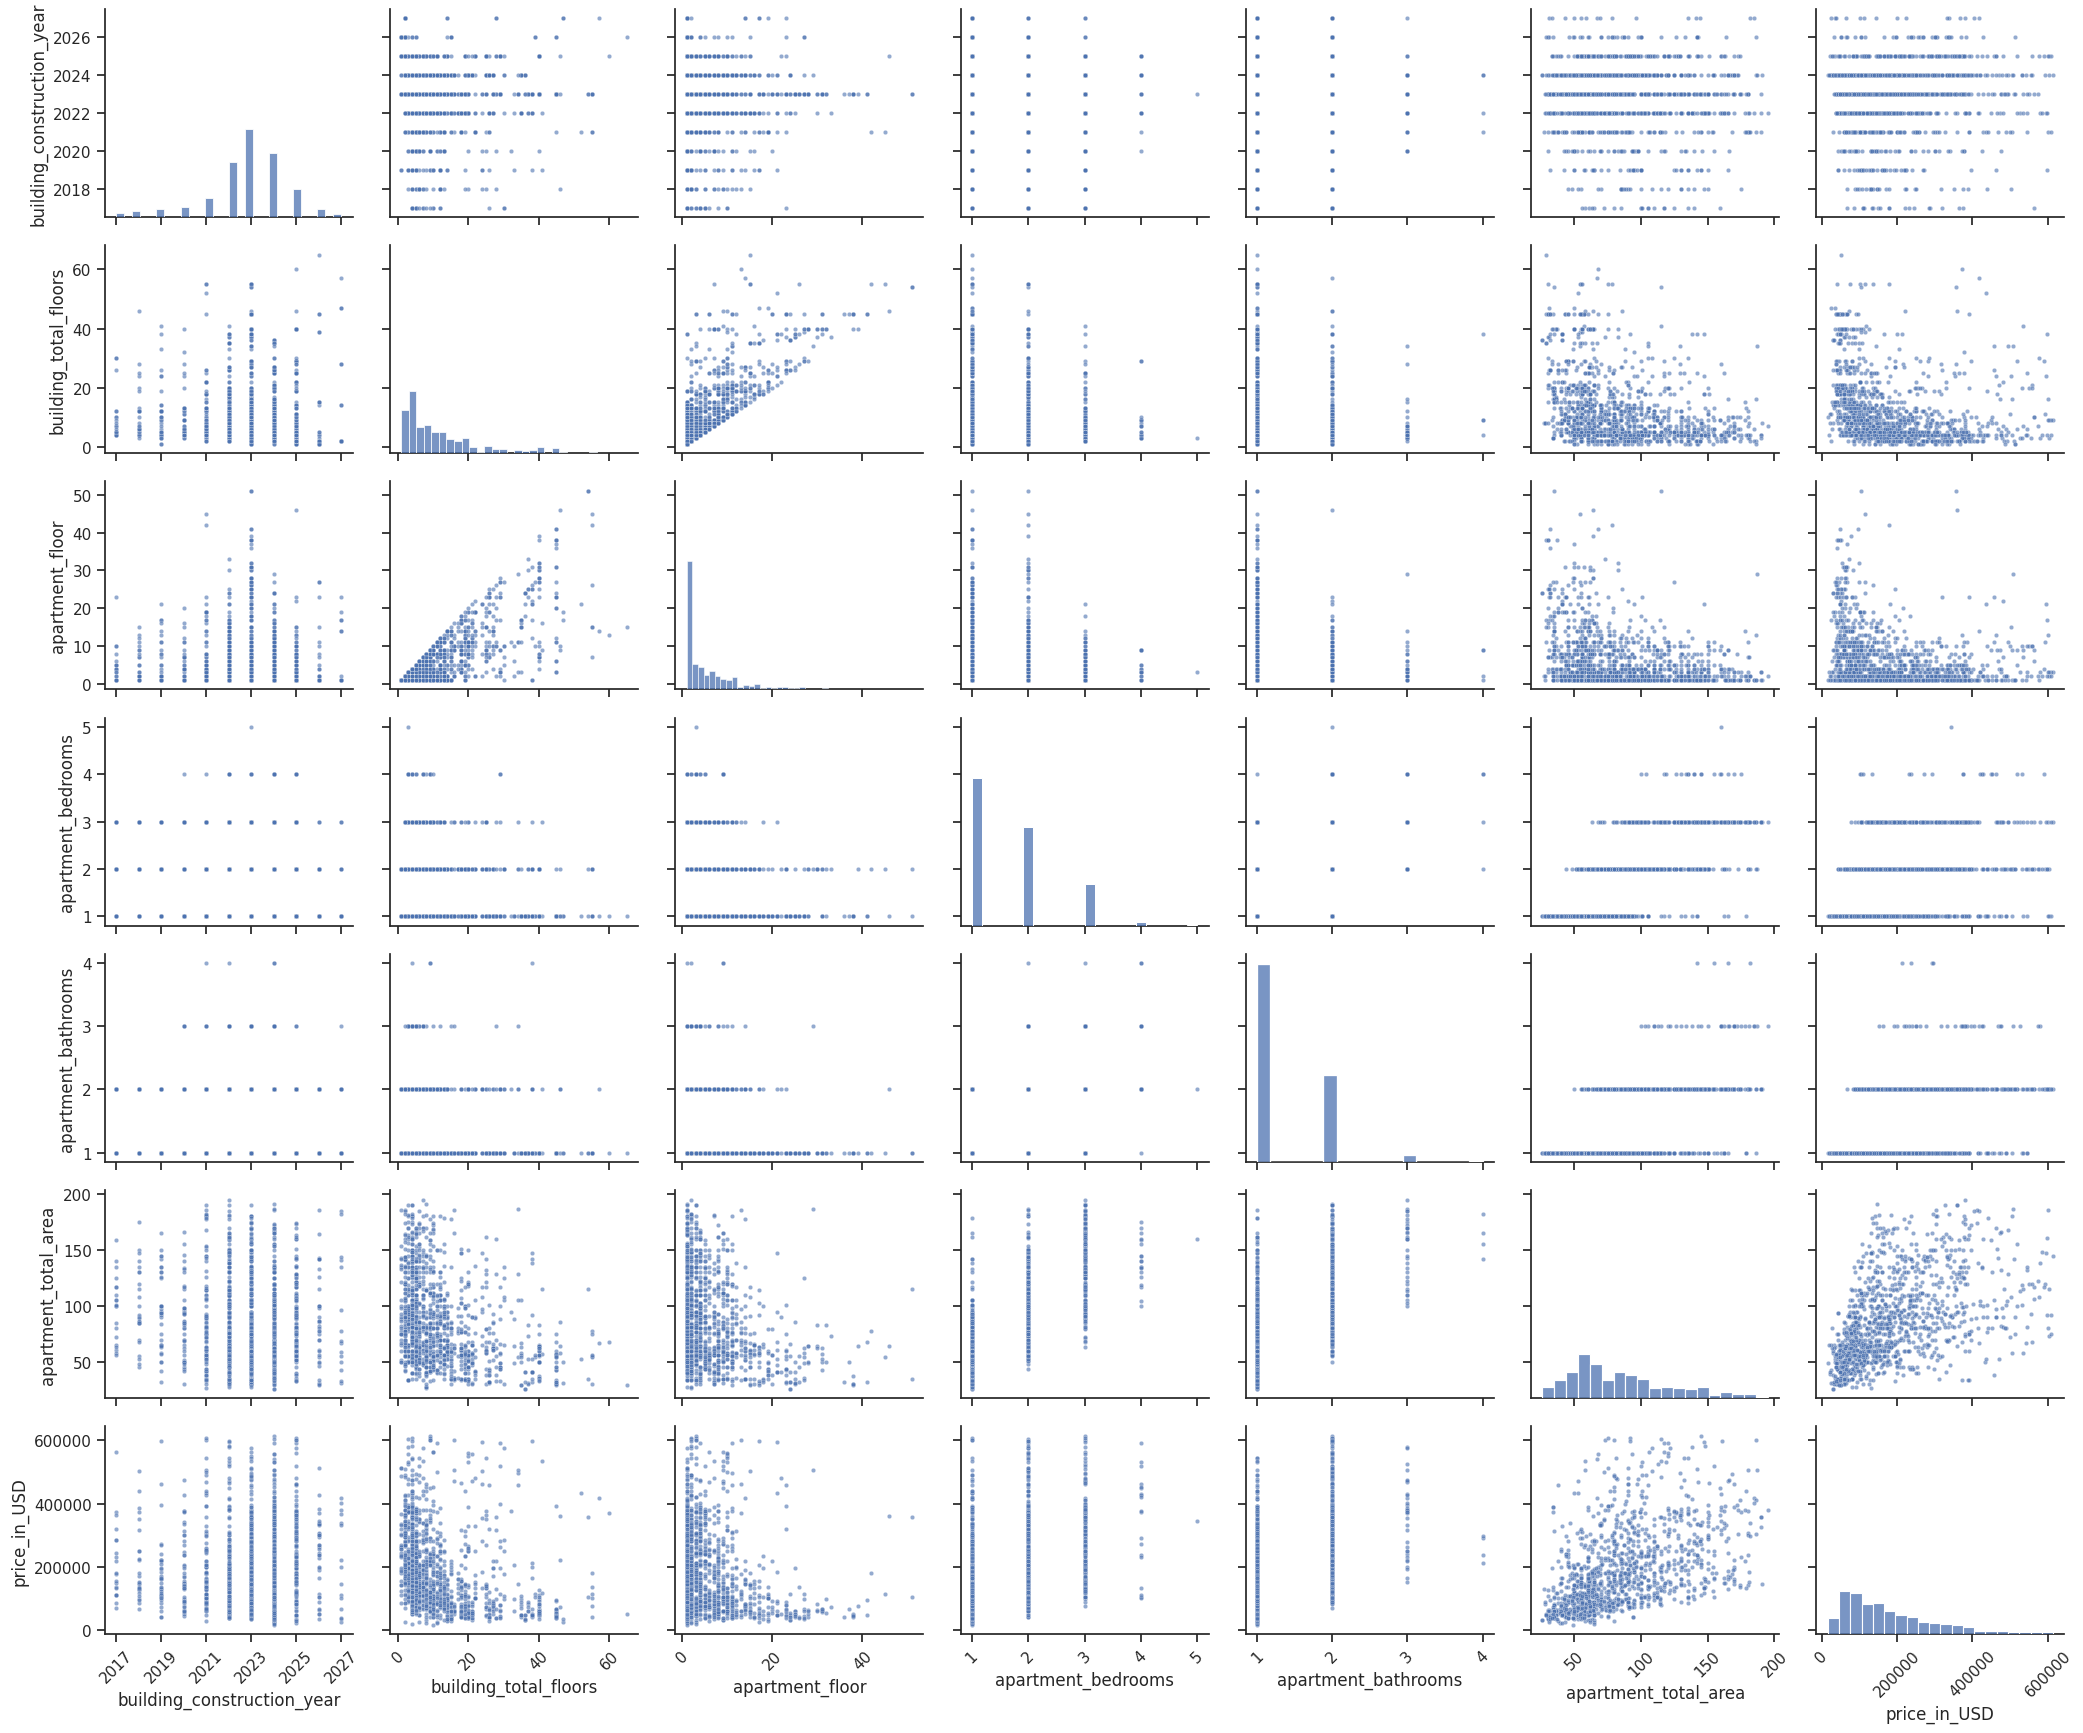

In [272]:
col_list = ['building_construction_year','building_total_floors', 'apartment_floor',
         'apartment_bedrooms', 'apartment_bathrooms',
        'apartment_total_area', 'price_in_USD']

sns.set(style="ticks")

g = sns.pairplot(
    data=df.filter(col_list),
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10, 'alpha': 0.6}
)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)

        if ax.get_xlabel() == 'building_construction_year':
            min_year = int(df['building_construction_year'].min())
            max_year = int(df['building_construction_year'].max())
            year_ticks = np.arange(min_year, max_year + 1, 2)
            ax.set_xticks(year_ticks)
plt.tight_layout()
plt.show()

#Label encoding using minmaxscaler to build linear regression model.

In [275]:
df.describe().round(2)

,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
count,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00
mean,2022.82,12.25,6.11,1.67,1.36,84.25,184644.56
std,1.79,11.18,7.24,0.78,0.54,37.21,127110.14
min,2017.00,1.00,1.00,1.00,1.00,26.00,15985.00
25%,2022.00,4.00,1.00,1.00,1.00,56.00,85120.00
50%,2023.00,8.00,3.00,1.00,1.00,76.00,149674.00
75%,2024.00,16.00,8.00,2.00,2.00,105.00,250000.00
max,2027.00,65.00,51.00,5.00,4.00,195.00,614347.00


In [276]:
df


,country,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
15,Czech Republic,2023.0,4.0,2.0,2.0,1.0,54,314990.0
146,Turkey,2020.0,4.0,4.0,2.0,1.0,93,248071.0
156,Uzbekistan,2025.0,11.0,8.0,1.0,1.0,76,90021.0
424,Turkey,2023.0,3.0,3.0,5.0,2.0,160,344556.0
491,Montenegro,2023.0,8.0,5.0,1.0,1.0,69,336245.0
...,...,...,...,...,...,...,...,...
146346,Indonesia,2024.0,4.0,2.0,1.0,1.0,101,490000.0
146360,Indonesia,2024.0,4.0,2.0,1.0,1.0,81,260000.0
147397,Indonesia,2024.0,4.0,4.0,1.0,1.0,60,140000.0
147408,Indonesia,2025.0,4.0,4.0,2.0,2.0,60,121800.0


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 15 to 147411
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     1329 non-null   object 
 1   building_construction_year  1329 non-null   float64
 2   building_total_floors       1329 non-null   float64
 3   apartment_floor             1329 non-null   float64
 4   apartment_bedrooms          1329 non-null   float64
 5   apartment_bathrooms         1329 non-null   float64
 6   apartment_total_area        1329 non-null   int64  
 7   price_in_USD                1329 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 93.4+ KB


In [279]:
country_counts = df['country'].value_counts()

print("Number of unique country in the dataset.", country_counts.shape[0])
print("\nList of countries and count\n")
print(country_counts)

Number of unique country in the dataset. 19

List of countries and count

country
Turkey             461
Georgia            375
Northern Cyprus    229
Spain               69
Montenegro          37
UAE                 25
Belarus             24
Russia              20
Thailand            19
Portugal            17
Cyprus              15
Indonesia           12
Uzbekistan          11
Poland               5
Latvia               3
Greece               3
Italy                2
Czech Republic       1
Australia            1
Name: count, dtype: int64


In [280]:
'''from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
def LabelEncoding(df):
    # Create a label encoder object
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])
    return df'''

"from sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import MinMaxScaler\ndef LabelEncoding(df):\n    # Create a label encoder object\n    le = LabelEncoder()\n    for col in df.columns:\n        if df[col].dtype == 'object':\n            le.fit(df[col])\n            df[col] = le.transform(df[col])\n    return df"

In [281]:
'''#converting categorical values into numerical datatype
df = LabelEncoding(df)'''

'#converting categorical values into numerical datatype\ndf = LabelEncoding(df)'

In [282]:
df = pd.get_dummies(df, columns=['country'], prefix='country', drop_first=True)
df

,building_construction_year,building_total_floors,apartment_floor,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD,country_Belarus,country_Cyprus,country_Czech Republic,...,country_Montenegro,country_Northern Cyprus,country_Poland,country_Portugal,country_Russia,country_Spain,country_Thailand,country_Turkey,country_UAE,country_Uzbekistan
15,2023.0,4.0,2.0,2.0,1.0,54,314990.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
146,2020.0,4.0,4.0,2.0,1.0,93,248071.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
156,2025.0,11.0,8.0,1.0,1.0,76,90021.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
424,2023.0,3.0,3.0,5.0,2.0,160,344556.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
491,2023.0,8.0,5.0,1.0,1.0,69,336245.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146346,2024.0,4.0,2.0,1.0,1.0,101,490000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146360,2024.0,4.0,2.0,1.0,1.0,81,260000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147397,2024.0,4.0,4.0,1.0,1.0,60,140000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147408,2025.0,4.0,4.0,2.0,2.0,60,121800.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [283]:
df.info()
'''losing Australia in order to avoid multicollinearity
in nominal variables "Country"'''

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 15 to 147411
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_construction_year  1329 non-null   float64
 1   building_total_floors       1329 non-null   float64
 2   apartment_floor             1329 non-null   float64
 3   apartment_bedrooms          1329 non-null   float64
 4   apartment_bathrooms         1329 non-null   float64
 5   apartment_total_area        1329 non-null   int64  
 6   price_in_USD                1329 non-null   float64
 7   country_Belarus             1329 non-null   bool   
 8   country_Cyprus              1329 non-null   bool   
 9   country_Czech Republic      1329 non-null   bool   
 10  country_Georgia             1329 non-null   bool   
 11  country_Greece              1329 non-null   bool   
 12  country_Indonesia           1329 non-null   bool   
 13  country_Italy               1329 no

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

X = df.drop("price_in_USD", axis=1)
y = df["price_in_USD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#Adding_a_constant_column_to_the_feature_matrix(X)_to_work_with_statsmodels.
X_train_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           price_in_USD   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     47.95
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          3.07e-139
Time:                        03:18:16   Log-Likelihood:                -11881.
No. Observations:                 930   AIC:                         2.381e+04
Df Residuals:                     906   BIC:                         2.393e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.531e+05   1.45e+04     10.593      0.0

In [285]:
df.drop(['apartment_bedrooms'],axis=1,inplace=True) #0.997

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 15 to 147411
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_construction_year  1329 non-null   float64
 1   building_total_floors       1329 non-null   float64
 2   apartment_floor             1329 non-null   float64
 3   apartment_bathrooms         1329 non-null   float64
 4   apartment_total_area        1329 non-null   int64  
 5   price_in_USD                1329 non-null   float64
 6   country_Belarus             1329 non-null   bool   
 7   country_Cyprus              1329 non-null   bool   
 8   country_Czech Republic      1329 non-null   bool   
 9   country_Georgia             1329 non-null   bool   
 10  country_Greece              1329 non-null   bool   
 11  country_Indonesia           1329 non-null   bool   
 12  country_Italy               1329 non-null   bool   
 13  country_Latvia              1329 no

In [287]:
X = df.drop("price_in_USD", axis=1)
y = df["price_in_USD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           price_in_USD   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     53.27
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          8.77e-158
Time:                        03:18:16   Log-Likelihood:                -13590.
No. Observations:                1063   AIC:                         2.723e+04
Df Residuals:                    1039   BIC:                         2.735e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.86e+05   8.89e+04      4.340      0.0

In [288]:
df.drop(['building_construction_year'],axis=1,inplace=True) #0.2

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 15 to 147411
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   building_total_floors    1329 non-null   float64
 1   apartment_floor          1329 non-null   float64
 2   apartment_bathrooms      1329 non-null   float64
 3   apartment_total_area     1329 non-null   int64  
 4   price_in_USD             1329 non-null   float64
 5   country_Belarus          1329 non-null   bool   
 6   country_Cyprus           1329 non-null   bool   
 7   country_Czech Republic   1329 non-null   bool   
 8   country_Georgia          1329 non-null   bool   
 9   country_Greece           1329 non-null   bool   
 10  country_Indonesia        1329 non-null   bool   
 11  country_Italy            1329 non-null   bool   
 12  country_Latvia           1329 non-null   bool   
 13  country_Montenegro       1329 non-null   bool   
 14  country_Northern Cyprus  1

In [290]:
X = df.drop("price_in_USD", axis=1)
y = df["price_in_USD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           price_in_USD   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     55.58
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          2.60e-158
Time:                        03:18:16   Log-Likelihood:                -13591.
No. Observations:                1063   AIC:                         2.723e+04
Df Residuals:                    1040   BIC:                         2.734e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.031e+05    8.8e+04      4.583      0.0